## Importing Libraries

In [92]:
import split_folders
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from sklearn import metrics
from keras.preprocessing import image
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

### Checking Directory for Files

In [54]:
os.listdir('/home/ipc-admin/Documents/NOME/cell-images-for-detecting-malaria/cell_images/train')

['Parasitized', 'Uninfected']

### Spliting my data folders into train , test , val

In [14]:
split_folders.ratio('/home/ipc-admin/Documents/NOME/cell-images-for-detecting-malaria/cell_images', output="output", seed=1337, ratio=(.8, .1, .1))

Text(0.5, 1.0, 'This is my Paratsitized Picture')

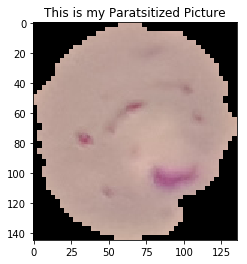

In [56]:
test_image = image.load_img('/home/ipc-admin/Documents/NOME/cell-images-for-detecting-malaria/cell_images/train/Parasitized/C39P4thinF_original_IMG_20150622_110115_cell_114.png')
plt.imshow(test_image)
plt.title('This is my Paratsitized Picture')

Text(0.5, 1.0, 'This is my Uninfected Picture')

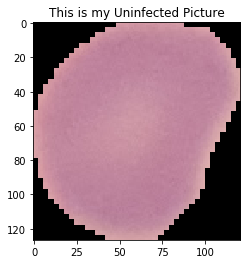

In [91]:
test_image = image.load_img('/home/ipc-admin/Documents/NOME/cell-images-for-detecting-malaria/cell_images/train/Uninfected/C6NThinF_IMG_20150609_121955_cell_54.png')
plt.imshow(test_image)
plt.title('This is my Uninfected Picture')


### Rescaling my data

In [4]:
traindata = ImageDataGenerator(rescale=1./255)
testdata = ImageDataGenerator(rescale=1./255)

### Retrieving Data from train , test and val directory 
### Setting the image size to 64x64 pixels

In [5]:
trainingdata = traindata.flow_from_directory('/home/ipc-admin/Documents/NOME/cell-images-for-detecting-malaria/cell_images/train',
                                             batch_size=32,
                                             target_size=(64,64),
                                             class_mode=('binary') 
                                            )
validation_generator = testdata.flow_from_directory('/home/ipc-admin/Documents/NOME/cell-images-for-detecting-malaria/cell_images/val',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = testdata.flow_from_directory('/home/ipc-admin/Documents/NOME/cell-images-for-detecting-malaria/cell_images/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 27049 images belonging to 2 classes.
Found 222 images belonging to 2 classes.
Found 398 images belonging to 2 classes.


### Making a Convolutional Neural Network Model

In [6]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Feeding Data to the CNN Model

In [7]:
cnn_model = cnn.fit_generator(trainingdata,
                         steps_per_epoch = 150,
                         epochs = 20,
                         validation_data = validation_generator,
                         validation_steps = 200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
150/150 [==============================] - 60s 400ms/step - loss: 0.6832 - acc: 0.6112 - val_loss: 0.7163 - val_acc: 0.4637
Epoch 2/20
150/150 [==============================] - 53s 355ms/step - loss: 0.5958 - acc: 0.6783 - val_loss: 0.7986 - val_acc: 0.4415
Epoch 3/20
150/150 [==============================] - 72s 481ms/step - loss: 0.5809 - acc: 0.6973 - val_loss: 0.7913 - val_acc: 0.4598
Epoch 4/20
150/150 [==============================] - 49s 330ms/step - loss: 0.5591 - acc: 0.7129 - val_loss: 0.6145 - val_acc: 0.6974
Epoch 5/20
150/150 [==============================] - 50s 333ms/step - loss: 0.4955 - acc: 0.7650 - val_loss: 0.5449 - val_acc: 0.7339
Epoch 6/20
150/150 [==============================] - 39s 262ms/step - loss: 0.4219 - acc: 0.8145 - val_loss: 0.5192 - val_acc: 0.7435
Epoch 7/20
150/150 [==============================] - 21s 137ms/step - loss: 0.3701 - acc: 0.8431 - val_loss: 0.4302 - val_acc: 0.8154
Epoch 8

### Test Accuracy

In [8]:
test_accu = cnn.evaluate_generator(test_set,steps=500)

print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 88.66544786493347 %


### Visualizing Training and validation loss

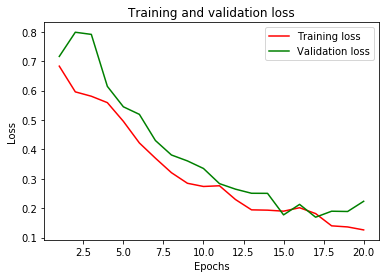

In [75]:
loss = cnn_model.history['loss']
val_loss = cnn_model.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Visualizing Training and validation accuracy

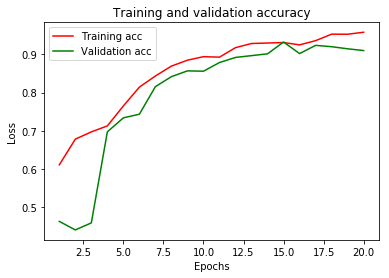

In [76]:
acc = cnn_model.history['acc']
val_acc = cnn_model.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Visualizing CNN images

In [82]:
from keras.models import Model
layer_outputs = [layer.output for layer in cnn.layers]
activation_model = Model(inputs=cnn.input, outputs=layer_outputs)
activations = activation_model.predict(test_image)
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

### CNN Layer images in first Layer

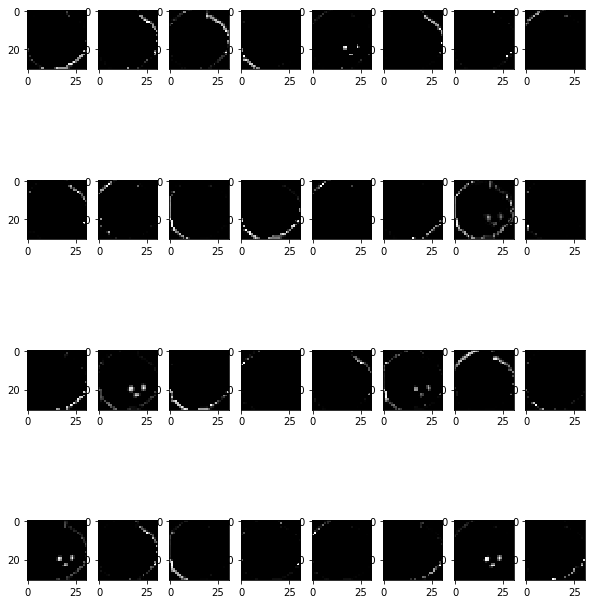

In [107]:
display_activation(activations, 8, 4, 1)

In [50]:
#cnn.save_weights("malriamodel.h5")

### Test Image

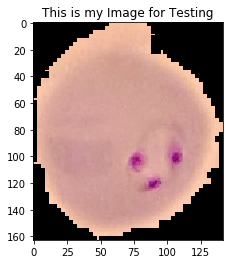

In [81]:
test_image = image.load_img('/home/ipc-admin/Documents/NOME/cell-images-for-detecting-malaria/cell_images/test1.png')
plt.imshow(test_image)
plt.title('This is my Image for Testing')
test_image = test_image.resize((64, 64), Image.ANTIALIAS)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

### Predicting test image

In [43]:
value = cnn.predict(test_image)

In [44]:
value

array([[0.]], dtype=float32)

In [45]:
if value[0][0]==1:
    print("Uninfected")
else:
    print("Parasitized")

Parasitized
